# Projeto ICD - Analise exploratória dos dados
## Correlação entre valor da aposta e posição do jogador

Procuramos uma correlação entre os atributos dos dados. 
Uma possível correlação seria entre a força das cartas da mão do jogador e seu valor de aposta.
Outra possível correlação é entre o valor da aposta e a posição do jogador no turno. Teoricamente, os últimos jogadores de uma rodada, por ja terem visto a ação dos jogadores anteriores, podem fazer decisões mais embasadas e, portanto, fazer apostas mais maiores. Tentaremos verificar a veracidade dessa afirmação a seguir:

### Imports

## Correlação entre Raise e Hand
(Valor de aposta e força da mão)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Carregando dados tratados:

In [2]:
df_corr = pd.read_csv('./poker_dados_regress.csv', sep= ',')
df_corr.head()

,Raise,Position,Hand,Pot,P1-Action,P1-Bet,P2-Action,P2-Bet,P3-Action,P3-Bet,P4-Action,P4-Bet,P5-Action,P5-Bet
0,225.0,4,133,150.0,sb,50.0,bb,100.0,f,0.0,f,0.0,hold,0.0
1,300.0,0,5017,150.0,bb,100.0,f,0.0,f,0.0,f,0.0,f,0.0
2,200.0,5,441,150.0,sb,50.0,bb,100.0,f,0.0,f,0.0,f,0.0
3,200.0,4,1189,150.0,sb,50.0,bb,100.0,f,0.0,f,0.0,hold,0.0
4,500.0,5,705,350.0,sb,50.0,bb,100.0,f,0.0,f,0.0,r,200.0


In [3]:
df_corr = df_corr[df_corr["Position"] > 1]

## Correlação entre Raise e Hand
(Valor de aposta e força da mão)

Text(0,0.5,'Hand')

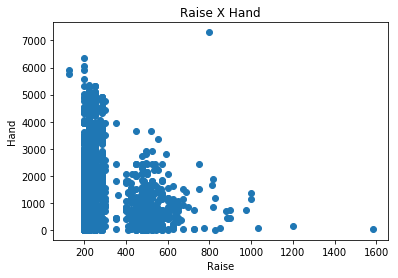

In [4]:
# Correlação entre Raise x Hand.

plt.scatter(df_corr['Raise'], df_corr['Hand'])
plt.title('Raise X Hand')
plt.xlabel('Raise')
plt.ylabel('Hand')

## Correlação entre Raise e Position
(Valor de aposta e posição do jogador)

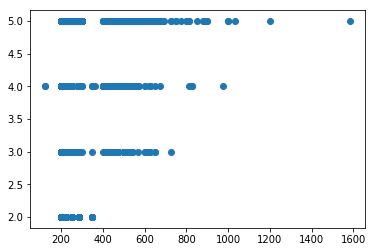

In [5]:
# Correlação entre Raise x Position.

plt.scatter(df_corr['Raise'], df_corr['Position'])

Podemos verificar uma possível correlação entre o aumento do valor das apostas e a posição dos jogadores.

In [6]:
# Média de Raise por Position.

raise_por_position = df_corr.groupby(['Position'])['Raise'].mean()
raise_por_position

Position
2    219.091190
3    231.734292
4    252.120249
5    289.055222
Name: Raise, dtype: float64

In [7]:
# Dados das médias.

media_raise_por_position = raise_por_position.mean()
variancia_raise_por_position =  raise_por_position.var()
raizn_raise_por_position = (raise_por_position.size)**.5
print('Média das médias:', media_raise_por_position)
print('Variância das médias: ', variancia_raise_por_position)
print('Raiz quadrada do número de linhas das médias: ', raizn_raise_por_position)

Média das médias: 248.00023840527192
Variância das médias:  934.2667512276809
Raiz quadrada do número de linhas das médias:  2.0


Faremos agora a permutação dos dados para verificar se os valores médios encontrados poderiam, potencialmente, ser verificados ao acaso.

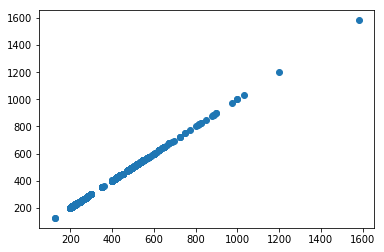

In [8]:
# Correlação Raise_shuffle x Position, apenas para verificar a distribuição.Faremos agora a permutação dos dados para verificar se os valores médios encontrados poderiam, potencialmente, ser verificados ao acaso.

df_shuffle = df_corr.copy()

np.random.shuffle(df_shuffle['Raise'].values)

plt.scatter(df_shuffle['Raise'], df_shuffle['Raise'])

In [9]:
# Média de Raise por Position da permutação.

raise_por_position_s = df_shuffle.groupby(['Position'])['Raise'].mean()
raise_por_position_s

Position
2    247.403400
3    258.283119
4    247.604361
5    250.364346
Name: Raise, dtype: float64

In [10]:
# Dados das médias permutadas.

media_raise_por_position_s = raise_por_position_s.mean()
variancia_raise_por_position_s =  raise_por_position_s.var()
raizn_raise_por_position_s = (raise_por_position_s.size)**.5
print('Média das médias permutadas:', media_raise_por_position_s)
print('Variância das médias permutadas: ', variancia_raise_por_position_s)
print('Raiz quadrada do número de linhas das médias permutadas: ', raizn_raise_por_position_s)

Média das médias permutadas: 250.91380656687184
Variância das médias permutadas:  25.961350106581843
Raiz quadrada do número de linhas das médias permutadas:  2.0


In [11]:
# Intervalo de confiança dos dados permutados.

ic_inf_raise_por_position_s = media_raise_por_position_s - 1.96* (variancia_raise_por_position_s/raizn_raise_por_position_s)
ic_sup_raise_por_position_s =  media_raise_por_position_s + 1.96* (variancia_raise_por_position_s/raizn_raise_por_position_s)
print('Intervalo de confiança inferior da permutação: ', ic_inf_raise_por_position_s)
print('Intervalo de confiança superior da permutação: ', ic_sup_raise_por_position_s)

Intervalo de confiança inferior da permutação:  225.47168346242162
Intervalo de confiança superior da permutação:  276.35592967132203


In [12]:
ic_inf_raise_por_position = media_raise_por_position - 1.96* (variancia_raise_por_position/raizn_raise_por_position)
ic_sup_raise_por_position =  media_raise_por_position + 1.96* (variancia_raise_por_position/raizn_raise_por_position)
print(ic_inf_raise_por_position)
print(ic_sup_raise_por_position)

-667.5811777978553
1163.581654608399


Podemos verificar então que, provavelmente, a variação dos valores de aposta pela posição do jogador no turno não ocorre ao acaso. Os valores de aposta, principalmente dos jogadores nas posições 2 e 5, variam muito além dos intervalos de confiança de uma situação de escolhas ao acaso.